# Linear Regression CaseStudy

# Predicting Medical Insurance costs 

### Many factors that affect how much you pay for health insurance are not within your control. Here are some factors that affect how much health insurance premiums cost

* age : age of primary beneficiary

* sex : insurance contractor gender, female, male

* bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children : Number of children covered by health insurance / Number of dependents

* smoker : Smoking

* region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

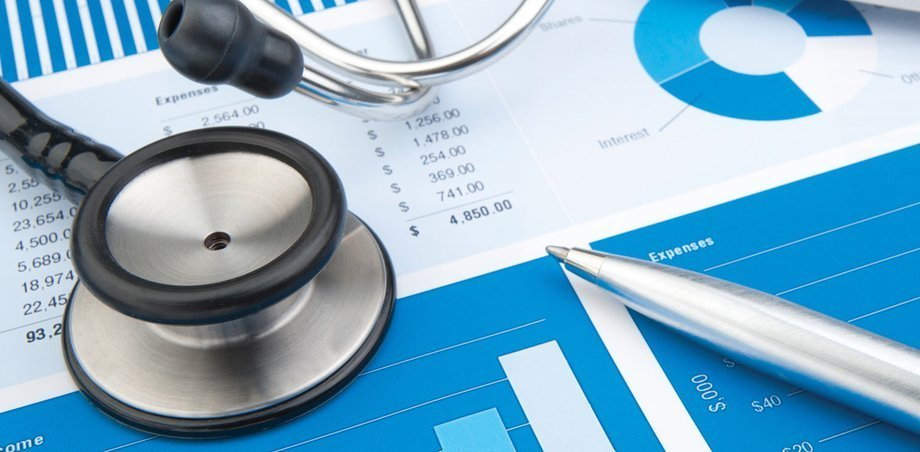

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

### Importing the dataset

In [2]:
os.chdir(r"G:\PYTHON JUPYTER NOTEBOOK")
path_data = os.getcwd()

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# For both numerical and categorical variables
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


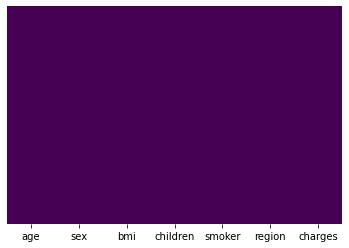

In [11]:
# We have no missing values which is very good. 
print(df.isnull().sum())

# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

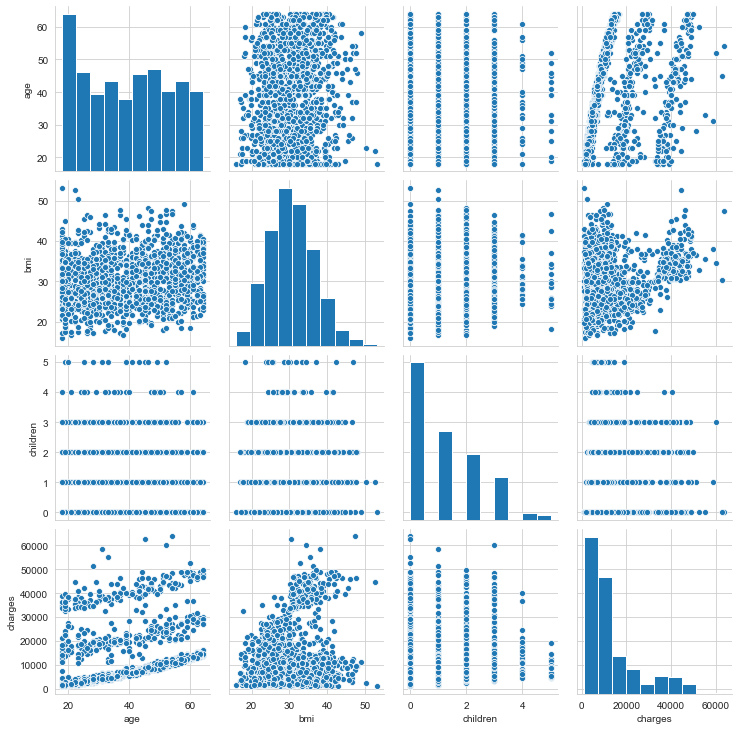

In [12]:
sns.set_style('whitegrid')
sns.pairplot(df)

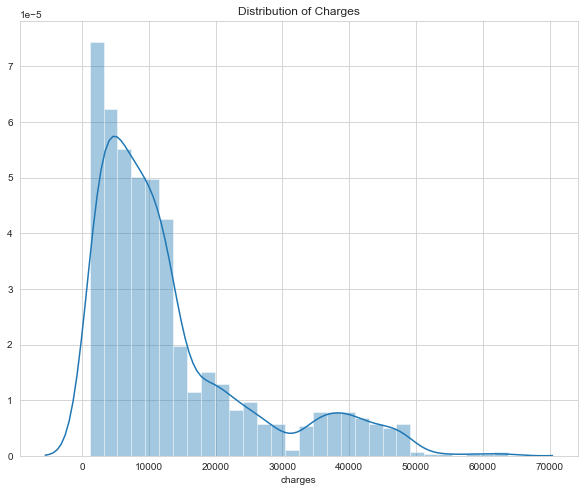

In [13]:
# Density distribution for target variable
plt.figure(figsize=(10,8))
sns.distplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

#### The graph is not a Gaussian distribution. This distribution is right-skewed.

### Outliers Check

#### For Outliers if it is Gaussian Distribution, then we will go be standard deviation

#### If it is not a Gaussian Distribution, we will go by IQR approach

{'whiskers': [<matplotlib.lines.Line2D at 0x183335b5220>,
 'caps': [<matplotlib.lines.Line2D at 0x183335b58e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18333776e80>],
 'medians': [<matplotlib.lines.Line2D at 0x183335b5fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x183335c02e0>],
 'means': []}

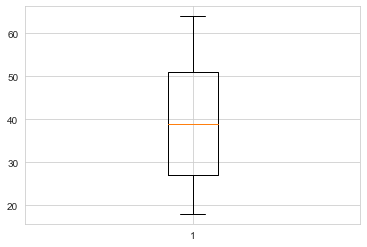

In [14]:
plt.boxplot(df['age'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x183335e6eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1833360c5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x183335e6b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1833360cc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1833360cf70>],
 'means': []}

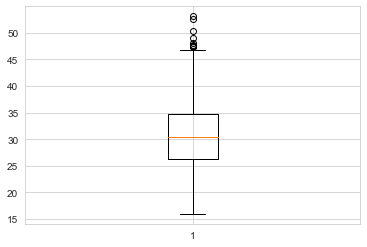

In [15]:
plt.boxplot(df['bmi'])

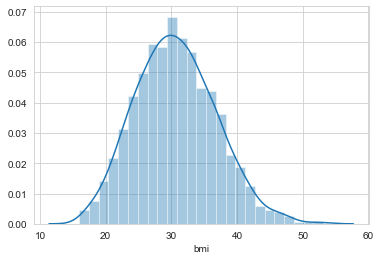

In [16]:
sns.distplot(df['bmi'])

#### The varible Temperature (C) can be seen as gaussian distribution

In [17]:
upper_bound = df['bmi'].mean() + 3*df['bmi'].std()
lower_bound = df['bmi'].mean() - 3*df['bmi'].std()

In [18]:
print(upper_bound)
print(lower_bound)

48.95795759602359
12.368836125949485


{'whiskers': [<matplotlib.lines.Line2D at 0x183336f85e0>,
 'caps': [<matplotlib.lines.Line2D at 0x183336f8ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x183336f8280>],
 'medians': [<matplotlib.lines.Line2D at 0x183337043a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x183337046a0>],
 'means': []}

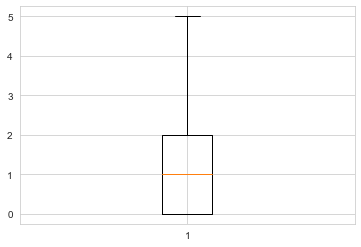

In [19]:
plt.boxplot(df['children'])
# No outlier found in this

{'whiskers': [<matplotlib.lines.Line2D at 0x183338c8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x183338d4190>,
 'boxes': [<matplotlib.lines.Line2D at 0x183338c8730>],
 'medians': [<matplotlib.lines.Line2D at 0x183338d4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x183338d4b50>],
 'means': []}

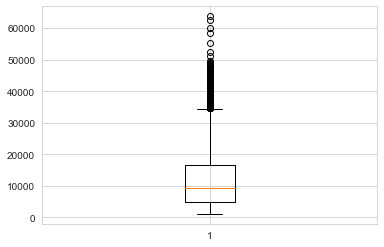

In [20]:
plt.boxplot(df['charges'])

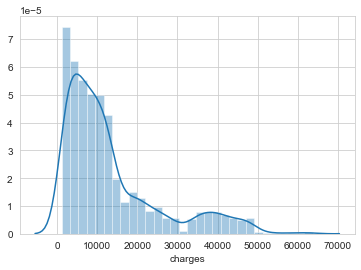

In [21]:
sns.distplot(df['charges'])

#### the variable Humidity is not a gaussian distribution

In [22]:
IQR = df['charges'].quantile(0.75) - df['charges'].quantile(0.25)
print('IQR:',IQR)

IQR: 11899.625365


In [23]:
Upper_bound = df['charges'].quantile(0.75) + (1.5 * IQR)
lower_bound = df['charges'].quantile(0.25) - (1.5 * IQR)

In [24]:
print(Upper_bound)
print(lower_bound)

34489.350562499996
-13109.1508975


### Handling the outliers

In [25]:
df.loc[df["bmi"] > 48.9, "bmi"] = 48.9

{'whiskers': [<matplotlib.lines.Line2D at 0x183339a35b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1833398e2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x183339a3100>],
 'medians': [<matplotlib.lines.Line2D at 0x183339b8b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x183339b8e80>],
 'means': []}

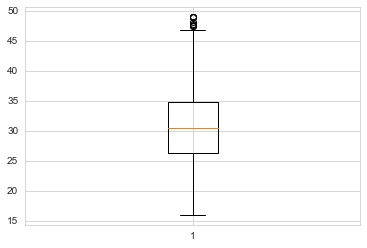

In [26]:
plt.boxplot(df['bmi'])

In [27]:
df.loc[df["charges"] > 34489.3, "charges"] = 34489.3

{'whiskers': [<matplotlib.lines.Line2D at 0x18333a0a5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x183339a8070>,
 'boxes': [<matplotlib.lines.Line2D at 0x18333a0aaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x18333a0b970>],
 'fliers': [<matplotlib.lines.Line2D at 0x18333a0bc70>],
 'means': []}

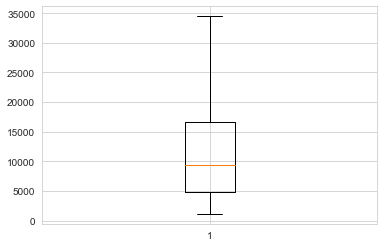

In [28]:
plt.boxplot(df['charges'])

#### Univariate plots

In [29]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

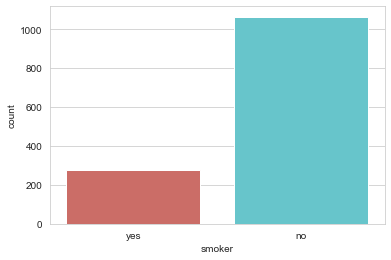

In [30]:
sns.countplot(x ='smoker', data = df, palette = 'hls')

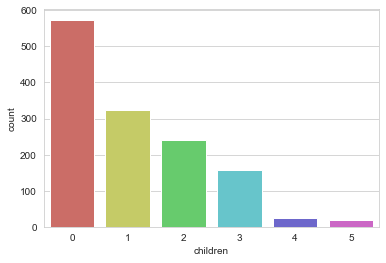

In [31]:
sns.countplot(x ='children', data = df, palette = 'hls')

In [32]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

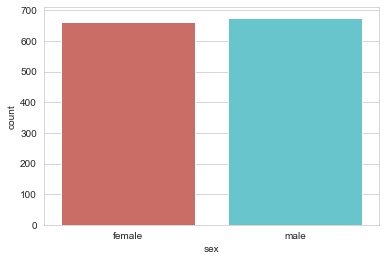

In [33]:
sns.countplot(x ='sex', data = df, palette = 'hls')

In [34]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

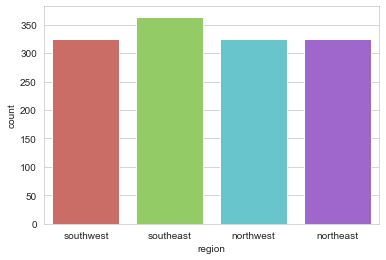

In [37]:
sns.countplot(x ='region', data = df, palette = 'hls')

In [38]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

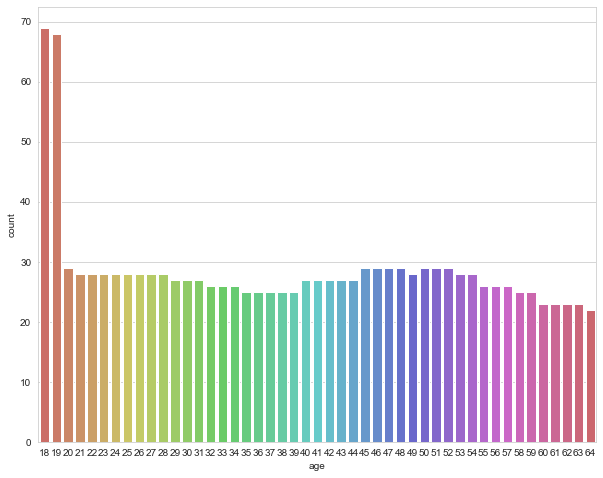

In [39]:
plt.subplots(figsize=(10,8))
sns.countplot(x ='age', data = df, palette = 'hls')

In [40]:
df.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [42]:
#creating dummies for categorical variables

In [43]:
df2 = pd.get_dummies(df, columns = ['sex', 'region', 'smoker'])

In [44]:
df2.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [45]:
df2.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_no', 'smoker_yes'],
      dtype='object')

In [46]:
df2.shape

(1338, 12)

### Correlation Matrix

In [47]:
# Correlation Matrix
df2.corr()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
age,1.000000,0.111219,0.042469,0.313394,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019
bmi,0.111219,1.000000,0.013349,0.160574,-0.045387,0.045387,-0.138026,-0.135855,0.269145,-0.005563,-0.003239,0.003239
children,0.042469,0.013349,1.000000,0.073074,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673
charges,0.313394,0.160574,0.073074,1.000000,-0.052322,0.052322,0.017237,-0.035204,0.059990,-0.044267,-0.785958,0.785958
sex_female,0.020856,-0.045387,-0.017163,-0.052322,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185
sex_male,-0.020856,0.045387,0.017163,0.052322,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,-0.076185,0.076185
region_northeast,0.002475,-0.138026,-0.022808,0.017237,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
region_northwest,-0.000407,-0.135855,0.024806,-0.035204,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
region_southeast,-0.011642,0.269145,-0.023066,0.059990,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
region_southwest,0.010016,-0.005563,0.021914,-0.044267,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945


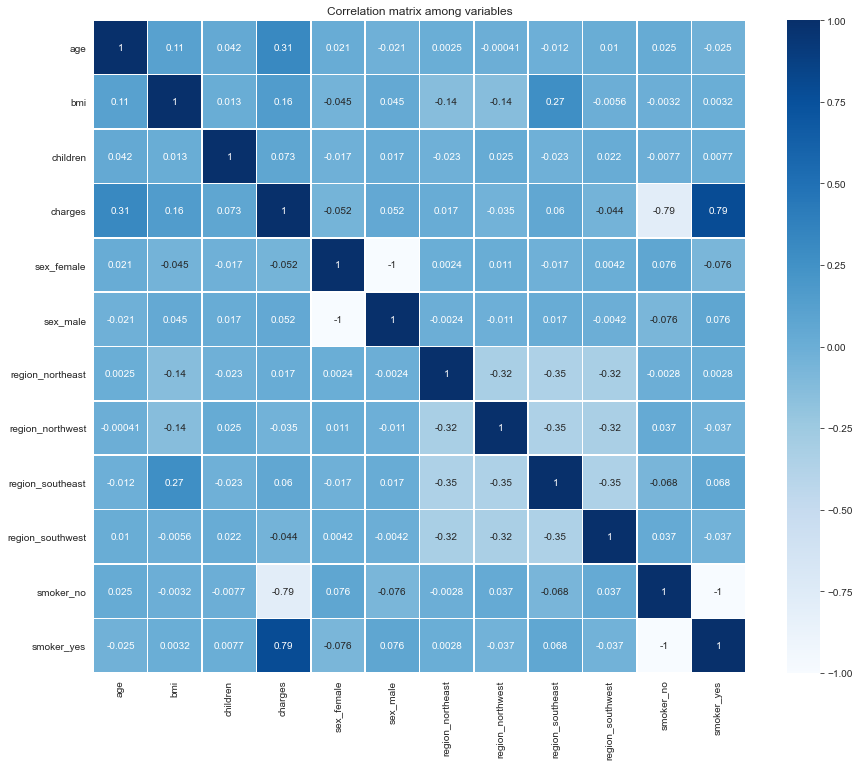

In [48]:
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

#### Creating the Independendent and Dependent Data Sets

In [49]:
# Feature or Independent variables
X = df2.drop(["charges"],axis = 1)

In [50]:
X.head()

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,0,0,1,0,1
1,18,33.770,1,0,1,0,0,1,0,1,0
2,28,33.000,3,0,1,0,0,1,0,1,0
3,33,22.705,0,0,1,0,1,0,0,1,0
4,32,28.880,0,0,1,0,1,0,0,1,0


In [51]:
# Label or Dependent variable
y = df2["charges"]

In [52]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Model Building

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
X_train.head()

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
621,37,34.100,4,0,1,0,0,0,1,0,1
194,18,34.430,0,0,1,0,0,1,0,1,0
240,23,36.670,2,1,0,1,0,0,0,0,1
1168,32,35.200,2,0,1,0,0,0,1,1,0
1192,58,32.395,1,1,0,1,0,0,0,1,0


In [55]:
X_test.head()

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
578,52,30.200,1,0,1,0,0,0,1,1,0
610,47,29.370,1,1,0,0,0,1,0,1,0
569,48,40.565,2,0,1,0,1,0,0,0,1
1034,61,38.380,0,0,1,0,1,0,0,1,0
198,51,18.050,0,1,0,0,1,0,0,1,0


In [56]:
y_train.head()

621     34489.30000
194      1137.46970
240     34489.30000
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

In [57]:
y_test.head()

578      9724.5300
610      8547.6913
569     34489.3000
1034    12950.0712
198      9644.2525
Name: charges, dtype: float64

In [58]:
# Fitting Multiple Linear Regression to the Training set

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction of the Model


In [61]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [62]:
y_pred[0:20]

array([10997.56065977,  9426.8030039 , 33105.31367159, 14848.05574556,
        8040.87785322,  5200.66300626,  2633.09253722, 13356.01975472,
        9008.37104782,  7597.91304035,  5913.46006642, 10455.02640607,
        8868.51304846,  4683.7548236 , 24789.64901791, 10673.09574516,
       11496.02435063,  6252.35989591,  8385.29547072, 23983.35835678])

#### Plotting the results

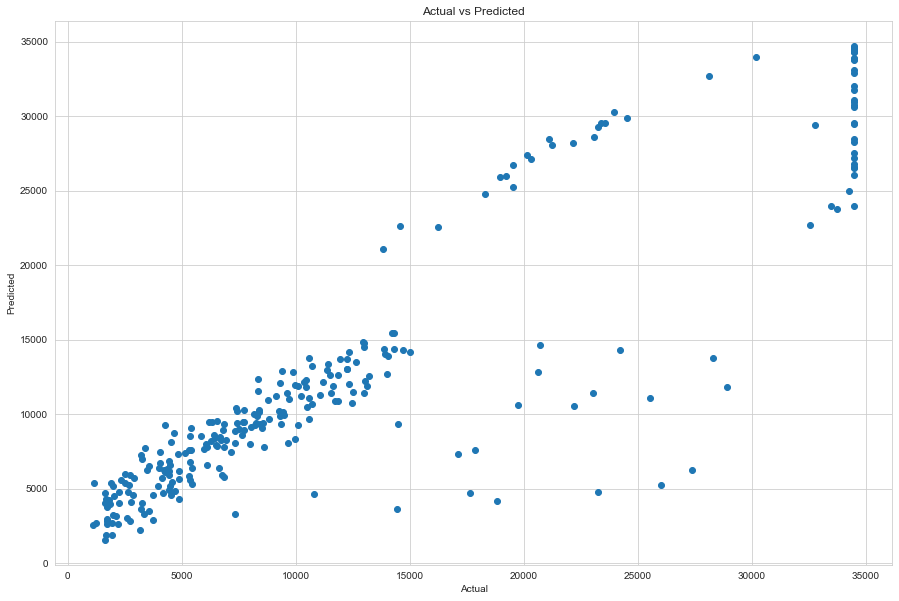

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [64]:
# Interpretation of actual, predicted and their difference 

In [65]:
y_pred_df3 = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_pred, "Difference" : y_test - y_pred}) 

In [66]:
y_pred_df3.head(10)

,Actual value,Predicted value,Difference
578,9724.53000,10997.560660,-1273.030660
610,8547.69130,9426.803004,-879.111704
569,34489.30000,33105.313672,1383.986328
1034,12950.07120,14848.055746,-1897.984546
198,9644.25250,8040.877853,1603.374647
981,4500.33925,5200.663006,-700.323756
31,2198.18985,2633.092537,-434.902687
1256,11436.73815,13356.019755,-1919.281605
1219,7537.16390,9008.371048,-1471.207148
1320,5425.02335,7597.913040,-2172.889690


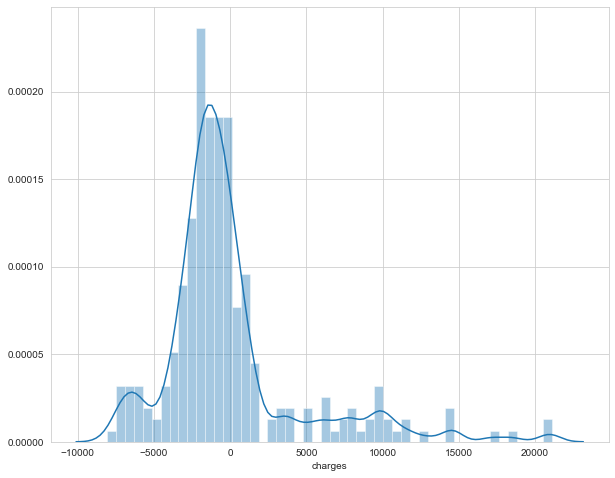

In [67]:
# Now we can see the normally distributed graph 
plt.figure(figsize=(10,8))
sns.distplot((y_test-y_pred),bins=50)
plt.show()

In [68]:
# r-square score on train data
regressor.score(X_train,y_train)

0.7355324811848216

In [69]:
# r-square score on test data
regressor.score(X_test,y_test)

0.794349102435043

In [70]:
from sklearn import metrics

In [71]:
#Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 3058.918326659421


In [72]:
#Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 21886341.63058991


In [73]:
#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4678.284047659987


### Model Statistics

In [74]:
import statsmodels.api as sm

In [75]:
#Adding Intercept term to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [76]:
#Converting into Dataframe
X_train_d = pd.DataFrame(X_train)

In [77]:
#Printing the Model Statistics
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     368.9
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          3.72e-300
Time:                        20:57:58   Log-Likelihood:                -10674.
No. Observations:                1070   AIC:                         2.137e+04
Df Residuals:                    1061   BIC:                         2.141e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              951.7061    410.366      2.319      0.021     146.485    1756.927
age                228.9241     11.463     19.970      0.000     206.430     251.418
bmi                222.1271     27.426      8.099      0.000     168.311     275.943
children           414.1471    132.631      3.123      0.002     153.899     674.395
sex_female         474.8069    258.206      1.839      0.066     -31.846     981.460
sex_male           476.8992    262.361      1.818      0.069     -37.906     991.705
region_northeast   724.6318    294.975      2.457      0.014     145.832    1303.432
region_northwest   413.8013    290.366      1.425      0.154    -155.955     983.558
region_southeast  -213.2031    320.616     -0.665      0.506    -842.316     415.910
region_southwest    26.4761    294.176      0.090      0.928    -550.758     603.710
smoker_no        -9483.9618    274.807    -34.511      0.000      -1e+04   -8944.734
smoker_yes        1.044e+04    296.866     35.153      0.000    9853.158     1.1e+04
==============================================================================
Omnibus:                      401.944   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1343.964
Skew:                           1.862   Prob(JB):                    1.45e-292
Kurtosis:                       7.035   Cond. No.                     7.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
#Checking the VIF Values

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

C:\Users\Ali\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Ali\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.0,const
1,1.0,age
2,1.1,bmi
3,1.0,children
4,inf,sex_female
5,inf,sex_male
6,inf,region_northeast
7,inf,region_northwest
8,inf,region_southeast
9,inf,region_southwest


In [81]:
#Storing Coefficients in DataFrame along with coloumn names
coefficients = pd.concat([pd.DataFrame(X_train_d.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

In [82]:
coefficients

,0,0
0,const,228.924136
1,age,222.127117
2,bmi,414.147073
3,children,-1.046128
4,sex_female,1.046128
5,sex_male,486.705270
6,region_northeast,175.874732
7,region_northwest,-451.129608
8,region_southeast,-211.450393
9,region_southwest,-9959.814896


In [83]:
# regression intercept
print('Intercept:' ,regressor.intercept_)

Intercept: 2141.338779190084
